# Intelligibility of Natural Audiovisual Speech - Insights

## Goal of this project:
### Our short-term goal was to to produce a map of the benefits of lip reading on speech understanding in noise. We wanted to measure this at the level of phonemes,the smallest units of speech. 
- Word: Insight
- Phonemes:  IH-N-S-AY-T

### The visual benefit map can then be used to find the factors that determine visual improvements in speech understanding, and can be used in conjuction with brain recording to test different models of audiovisual intergration in the brain.  






## Approach:
### First, I had volunteers watch and listen to videos of people saying hundreds of unique sentences in noise and had listeners type out the sentence they thought they heard. 

#### Example Sentence

In [17]:
## 
import io
import base64
from IPython.display import HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from __future__ import division
import landkit
import anova2 #Two way repeated measures ANVOA code from d1Mason (GitHub)
import math
def amp2db(scalar):
    return 20 * math.log10(scalar)
def normdata(series):
    return (series-min(series))/(max(series)-min(series))
print ['somehow we old timers never figured we would ever retire']

##Display example talker
video = io.open('C:\\TCDTIMIT\\volunteersSmall\\s38F\\straightcam\\si907.mp4', 'r+b').read()
encoded = base64.b64encode(video)
print 'An Example Talker:'
HTML(data='''<video width="310" height="310" alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))



['somehow we old timers never figured we would ever retire']
An Example Talker:


### I used a small Python module I developed called landkit  (https://github.com/kerlinjr/landk) to parse, spell correct, align and grade each response at the level of individual words and phonemes.  See an example below.

In [18]:
## Display example phonetic transcription
orig_sentence = ['somehow we old timers never figured we would ever retire']
transcribed_sentence = ['somhow we old timerz ne!ver found wood in time']
print orig_sentence
print transcribed_sentence
sc = landkit.SentCompare(list(orig_sentence),list(transcribed_sentence),True,os.path.normpath('C:\Experiments\JK302'))
wordTable = sc.phonTable.groupby(['WordCount']).first()[['TargetWord','SourceWord','WordACC']]
print 'Mean Word Accuracy: ' + str(wordTable['WordACC'].mean())
wordTable

['somehow we old timers never figured we would ever retire']
['somhow we old timerz ne!ver found wood in time']
go
['somehow', 'we', 'old', 'timers', 'never', 'found', 'wood', 'in', 'time', '-']
Loading Iphod for sentence 0
Ngram loading trial 0
Mean Word Accuracy: 0.5


,TargetWord,SourceWord,WordACC
WordCount,,,
0,somehow,somehow,1
1,we,we,1
2,old,old,1
3,timers,timers,1
4,never,never,1
5,figured,found,0
6,we,wood,0
7,would,in,0
8,ever,time,0


In [19]:
phonemeTable = sc.phonTable[['PhonemeCount','TargetPhoneme','SourcePhoneme','PhonemeHitBool','WordACC','TargetWord']]
print 'Mean Word Accuracy: ' + str(phonemeTable['PhonemeHitBool'].mean())
phonemeTable

Mean Word Accuracy: 0.684210526316


,PhonemeCount,TargetPhoneme,SourcePhoneme,PhonemeHitBool,WordACC,TargetWord
0,0,S,S,True,1,somehow
1,1,AH,AH,True,1,somehow
2,2,M,M,True,1,somehow
3,3,HH,HH,True,1,somehow
4,4,AW,AW,True,1,somehow
5,5,W,W,True,1,we
6,6,IY,IY,True,1,we
7,7,OW,OW,True,1,old
8,8,L,L,True,1,old
9,9,D,D,True,1,old


### Initial Settings to Facilitate Analysis and Visualization

In [20]:
#Load modules and import data from 3 experiments

# Load and preprocess a LandKit table
def load_df(filename):
    df = pd.DataFrame.from_csv(filename)
    #df = pd.DataFrame.from_csv('C:/Experiments/JK302b/dataOut/bigPJK302b_6subs.csv')
    #df = pd.DataFrame.from_csv('C:/Experiments/JK307/dataOut/bigP_r1.csv')

    #Relabel babble condition for clarity
    df.loc[df['VideoCond'] == 'AV',('VideoCond')] = 'Audiovisual'
    df.loc[df['VideoCond'] == 'AO',('VideoCond')] = 'Auditory Only'


    #Make WordIdx start from 1, not zero
    df.WordIdx = df.WordIdx+1

    # Fix phoneme alignment issue (correct word given but phonemes assigned to wrong word)
    # Find where words match
    matchIdx = df['SourceWord'] == df['TargetWord']
    #Set the source phonemes to match the target
    df.loc[matchIdx,('SourcePhoneme')] = df.loc[matchIdx,('TargetPhoneme')] 
    #Reset the measure of phoneme accuracy
    df.loc[:,'PhonemeHitBool'] = df['SourcePhoneme'] == df['TargetPhoneme']
    #Set a measure all phonemes matching
    df.loc[:,('AllPhonsMatch')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==1)
    #Set a measure all phonemes missing
    df.loc[:,('AllPhonsMiss')] = df.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==0)
    # Make a column for the number of words in the sentence
    df['NumWordsInSentence'] = df.groupby(['SentenceCount'])['WordIdx'].transform(max)
    # Make a column for the number of phonemes in the word
    df['NumPhonemesInWord'] = df.groupby(['WordCount'])['PhonemeIndex'].transform(lambda x: np.max(x)-np.min(x)+1)
    #Position of the word in relation to the last word of the sentence
    df['WordFromLast'] = df['NumWordsInSentence']-df['WordIdx']
    # Calculate dB from RMS values
    import math
    def amp2db(scalar):
        return 20 * math.log10(scalar)
    df['SpeechdB'] =  df['SpeechRMS'].apply(lambda x: amp2db(x) if x >=0 else 0)
    df['SpeechdBRel'] = df[['SpeechdB','SentenceCount']].groupby('SentenceCount').apply(lambda x: x-np.mean(x))['SpeechdB']
    
    dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme_r5.xlsx'),encoding='latin-1')
    #df = df[df['TargetPhoneme'].isin(dfPT['CMU Phonemes'])]
    df = pd.merge(df, dfPT, how='inner', left_on = 'TargetPhoneme',right_on = 'CMU Phonemes' )
    return df
#df.rename(columns={'0':'PENNPOS'}, inplace=True)
#df.rename(columns={'0.1':'UPOS'}, inplace=True)

fig_folder = 'C:\Experiments\JK302\Figures\Rev7'

def export_fig(fig_folder,fig_name):
    # savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

    format_name = 'png'
    plt.savefig(os.path.normpath(os.path.join(fig_folder,fig_name + '.' + format_name)),format = format_name, bbox_inches = 'tight',dpi = 300, pad_inches=0.3,transparent = False)

In [21]:
#Make plots prettier
#Edited from Randel Olson and many at StackOverflow
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 


plt.rc('text', color = 'black') 
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('axes', titlesize = 18, labelsize = 14,labelcolor ='black')  
plt.rc('lines', linewidth=2,markersize = 10)
plt.rc('xtick',labelsize = 10,color ='black')
plt.rc('ytick',labelsize = 10,color ='black')
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
%matplotlib inline

In [22]:
# Make errorbars prettier
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = next(ax._get_lines.prop_cycler)['color']
    if np.isscalar(yerr) and yerr == 0:
        ymin = 0
        ymax = 0
    elif np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [23]:
#Loading the data
df_name = []
df_name.append('C:/Experiments/JK302/dataOut/bigP_24_r3.csv')
df_label = []
df_label.append('Main')

dfs = []
dfs.append(load_df(df_name[0]))

## Does lip movement improve speech perception in noise?

,SS,num Df,Error SS,den Df,F,Pr(>F)
(Intercept),462732.704433,1,2713.567098,23,3922.089198,3.332280e-27
SoundCond,54531.631976,1,1182.919559,23,1060.281340,9.571646e-21
VideoCond,2372.952049,1,302.463769,23,180.444413,2.254047e-12
SoundCond:VideoCond,1778.966700,1,254.693066,23,160.649187,7.361280e-12


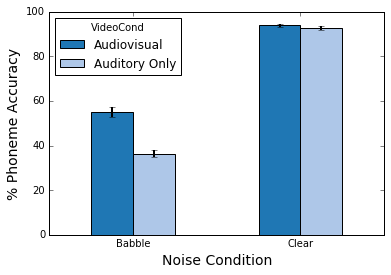

In [24]:
df = dfs[0] # Take data from the main experiment
numSubs = len(df['Subject'].unique())
videoByBabble = df[['VideoCond','SoundCond','PhonemeHitBool','Subject']].groupby(['SoundCond','VideoCond','Subject']).mean().apply(lambda x: x*100)
means = videoByBabble.reset_index().groupby(['SoundCond','VideoCond']).mean()['PhonemeHitBool'].unstack()
errors = videoByBabble.reset_index().groupby(['SoundCond','VideoCond']).std()['PhonemeHitBool'].unstack()/np.sqrt(float(numSubs-1))

## Plot bar graph
ax = means.plot(kind ='bar',yerr = errors,figsize = (6,4), color = [tableau20[x] for x in [0,1]],rot=0)
ax.set_ylabel('% Phoneme Accuracy')
ax.set_xlabel('Noise Condition')
#export_fig(fig_folder,'Main2x2Bar')
## Show ANOVA stats tables
rmANOVAFormat = videoByBabble.unstack().unstack().transpose().unstack().reset_index(drop = True)
rmanovaOut = anova2.anova2(rmANOVAFormat, print_summary=False)
rmanovaOut[0]





## Yes! Lip movement information substantially increases sentence intelligibility when background noise is present (~20% improvement).

###  Next, I made a map of visual benefit across all phonemes in the style of a popular pronunciation chart (Underhill) using Bokeh.

In [25]:
data = df[['VideoCond','SoundCond','PhonemeHitBool','TargetPhoneme']].groupby(['TargetPhoneme','VideoCond','SoundCond']).mean().reset_index()
data = data.loc[data['SoundCond'] == 'Babble',:]
av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
aoByPhonemes = ao[['TargetPhoneme','SoundCond','PhonemeHitBool']].groupby(['TargetPhoneme','SoundCond']).mean()['PhonemeHitBool'].unstack()['Babble']*100
aoByPhonemes.name = 'aoBabbleHitRate'
avByPhonemes = av[['TargetPhoneme','SoundCond','PhonemeHitBool']].groupby(['TargetPhoneme','SoundCond']).mean()['PhonemeHitBool'].unstack()['Babble']*100
avByPhonemes.name = 'avBabbleHitRate'
rawByPhonemes = avByPhonemes-aoByPhonemes
rawByPhonemes.name = 'rawByPhonemes'
dfPT = pd.read_excel(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhoneme_r5.xlsx'),encoding='latin-1')
df['SpeechdB'] =  df['SpeechRMS'].apply(lambda x: amp2db(x) if x >=0 else 0)
df['SpeechdBRel'] = df[['SpeechdB','SentenceCount']].groupby('SentenceCount').apply(lambda x: x-np.mean(x))['SpeechdB']
RelByPhoneme=  df[['TargetPhoneme','SpeechdBRel']].groupby('TargetPhoneme').mean().iloc[:,0]
RelByPhoneme.name = 'RelByPhoneme'
valuesDF = pd.concat([aoByPhonemes,avByPhonemes,rawByPhonemes,RelByPhoneme],axis=1).reset_index()
valuesDF.keys()
joined = pd.merge(dfPT, valuesDF, how='inner', left_on = 'CMU Phonemes',right_on = 'TargetPhoneme'  )
joined = joined.set_index('CMU Phonemes')
joined.to_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')

dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')



from bokeh.models import HoverTool, ColumnDataSource,CustomJS, ColorBar, LinearColorMapper, FixedTicker
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook,vform,push_notebook
global source
from bokeh.palettes import Greens9 as palette
output_notebook()

source = ColumnDataSource(
    data=dict(
        xaxis=[str(x) for x in dfPT['AdrianXCoord']],
        yaxis=[str(y) for y in dfPT['AdrianYCoord']],
        xaxisSym=[str(x) for x in dfPT['AdrianXCoord']],
        yaxisSym=[str(y+.2) for y in dfPT['AdrianYCoord']],
        xaxisExample=[str(x) for x in dfPT['AdrianXCoord']],
        yaxisExample=[str(y-.2) for y in dfPT['AdrianYCoord']],
        xaxisCMU=[str(x) for x in dfPT['AdrianXCoord']],
        yaxisCMU=[str(y) for y in dfPT['AdrianYCoord']],
        cmu=[str(s) for s in dfPT.index],
        #type=[str(x) for x in cmap],
        sym=[x for x in dfPT['IPA symbol']],
        jrank=[x for x in dfPT['Jeffers Visibility Rank']],
        mpcrank=[x for x in dfPT['MPC Rank']],
        audioOnlyHitRate =[np.round(x) for x in dfPT['aoBabbleHitRate']], 
        audioVisualHitRate =[np.round(x) for x in dfPT['avBabbleHitRate']], 
        visualBenefit = [np.round(x) for x in np.array([x for x in dfPT['avBabbleHitRate']])-np.array([x for x in dfPT['aoBabbleHitRate']])],
        example=[x for x in dfPT['CMU Examples']],   
        #type_color = ['#%02x%02x%02x' % (0,0,0) if math.isnan(x) else '#%02x%02x%02x' % (x*255,255-(x*255),0) for x in cmap] #Must be hexadecima
    )
)

title = 'Visual Benefit Map'
p = figure(title=title, tools="hover,save")
p.axis.visible = False      
# p = figure(title=title, tools="hover,save")
p.plot_width = 1200
#p.toolbar_location = None
p.outline_line_color = None
palette = palette[::-1]
color_mapper = LinearColorMapper(palette = palette, low=10, high=25)

p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
       fill_alpha=0.6, fill_color={'field': 'visualBenefit', 'transform': color_mapper})



#p.rect("xaxis", "yaxis", 0.9, 0.9, source=source,
#       fill_alpha=0.6)

text_props = {
    "source": source,
    "angle": 0,
    "color": "black",
    "text_align": "left",
    "text_baseline": "middle"
}



p.text(x="xaxisSym", y="yaxisSym", text="sym",
       text_font_style="bold", text_font_size="15pt", **text_props)

p.text(x="xaxisExample", y="yaxisExample", text="example",
       text_font_style="bold", text_font_size="8pt", **text_props)

p.text(x="xaxisCMU", y="yaxisCMU", text="cmu",
       text_font_style="bold", text_font_size="8pt", **text_props)

p.grid.grid_line_color = None

p.select_one(HoverTool).tooltips = [
#     ("cmu", "@cmu"),
#     ("example", "@example"),
#     ("jrank","@jrank"),
#     ("mpcrank","@mpcrank"),
#     ("sumbyratio","@sumbyratio"),
#     ("sumbyrank","@sumbyrank"),

    ("AudioVisual Accuracy (%)","@audioVisualHitRate"),
    ("Visual Accuracy (%)","@audioOnlyHitRate"),
    ("Visual Benefit (%)","@visualBenefit")
]


color_bar = ColorBar(color_mapper=color_mapper, orientation='horizontal',
                     location='top_right', scale_alpha=0.6,
                     ticker=FixedTicker(ticks=[10,25]))
p.add_layout(color_bar)

output_file('C:\Experiments\JK302\Figures\VisualBenefitMap.html', title='Visual Benefit Map')
show(p) 

Loading BokehJS ...

## What best explains why some phonemes are more visually useful than others? 
### I tested 3 predictors of visual benefit using OLS regression: Place of Articulation, Roundedness, and Phoneme Volume 

In [26]:
## Load data from table
dfPT = pd.DataFrame.from_csv(os.path.normpath('C:\TCDTIMIT\Tables\Custom\TablesPhonemeWithData.csv'),encoding='utf-8')
dfPT = dfPT[dfPT['Phon Type (American IPA)'].isin(['Consonant','Special'])]
dfPT['VisualBenefit'] = [np.round(x) for x in np.array([x for x in dfPT['avBabbleHitRate']])-np.array([x for x in dfPT['aoBabbleHitRate']])]
z = dfPT['Consonant Position']
y = dfPT['VisualBenefit']
n = dfPT.index

## Ordinary Least Squares Stats
import statsmodels.api as sm
import statsmodels.formula.api as smf 
ols = sm.OLS(y, sm.add_constant(dfPT[['Consonant Position','Roundedness (American)','RelByPhoneme']]))
result = ols.fit()
print result.summary()




                            OLS Regression Results                            
Dep. Variable:          VisualBenefit   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     14.26
Date:                Thu, 10 Nov 2016   Prob (F-statistic):           3.36e-05
Time:                        09:38:46   Log-Likelihood:                -45.930
No. Observations:                  24   AIC:                             99.86
Df Residuals:                      20   BIC:                             104.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
const                     22

Pearson R-squared 0.592236940778 1.10230713261e-05


Consonant Position
1    22.798801
2    21.803311
3    19.275079
4    17.809708
5    17.969186
6    15.432767
7    16.886488
Name: Babble, dtype: float64

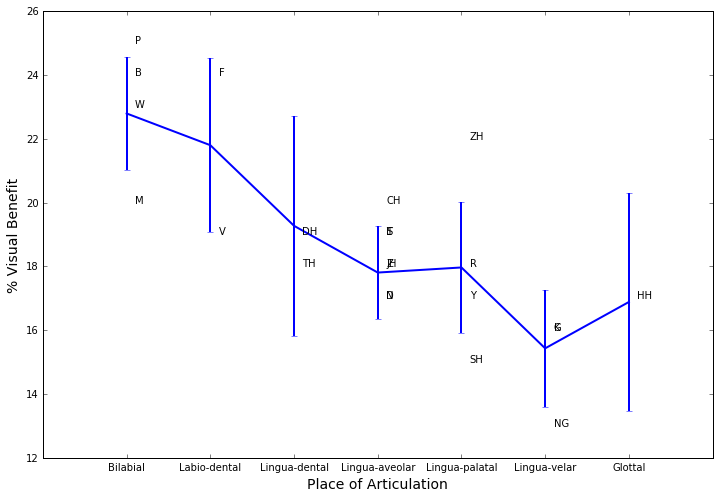

In [27]:
from scipy.stats import pearsonr
#Load in Consonant Position data 
placeLabels = ['','Bilabial','Labio-dental','Lingua-dental','Lingua-aveolar','Lingua-palatal','Lingua-velar','Glottal','']
data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','Consonant Position']].groupby(['Consonant Position','VideoCond','Subject','SoundCond']).mean().reset_index()
av = data.loc[data['VideoCond'] == 'Audiovisual',:].reset_index()
ao = data.loc[data['VideoCond'] == 'Auditory Only',:].reset_index()
av['VisualBenefit'] = (av['PhonemeHitBool']-ao['PhonemeHitBool'])*100
av = av.loc[av['SoundCond'] == 'Babble',:]
av = av[av['Consonant Position'] > 0]

#Generate error plot based on inter-subject varience
means = av[['Consonant Position','SoundCond','VisualBenefit']].groupby(['Consonant Position','SoundCond']).mean()['VisualBenefit'].unstack()['Babble']
errors = av[['Consonant Position','SoundCond','VisualBenefit']].groupby(['Consonant Position','SoundCond']).std()['VisualBenefit'].unstack()['Babble']/np.sqrt(float(numSubs-1))
means
errors 
ax = means.plot(kind = 'line',yerr= errors,figsize=(12,8))

## Superimpose individual phonemes in a scatterplot
ax.scatter(z, y,alpha=0.0)
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.1,y[i]))
plt.xticks([0,1,2,3,4,5,6,7,8],placeLabels)
plt.ylabel('% Visual Benefit')
plt.xlabel('Place of Articulation')
#export_fig(fig_folder,'VisBenVsPlace')
r, pval = pearsonr(z,y)
print 'Pearson R-squared ' + str(r**2) + ' ' + str(pval)
means



### Loads of features!

In [28]:
#Show all keys available in the Main dataframe
df = dfs[0]
keys = df.keys()
print len(keys)
print "\n".join([x for x in keys])

144
level_0
Unnamed: 0.1
index
TotalTrialOrder
Talker
SentenceType
SentenceID
Gender
NumWords
AVOrder
SoundCond
VideoCond
CounterBalBlock
TrialOrder
BabbleFile
Subject
SubjectTalkerNum
SourceSentence
TargetSentence
dBSNR
1LogGram
2LogGram
3LogGram
Indx
Word_x
UnTrn
StTrn
NSyll
NPhon
unsDENS
unsFDEN
unsLDEN
unsCDEN
strDENS
strFDEN
strLDEN
strCDEN
unsBPAV
unsFBPAV
unsLBPAV
unsCBPAV
strBPAV
strFBPAV
strLBPAV
strCBPAV
unsTPAV
unsFTPAV
unsLTPAV
unsCTPAV
strTPAV
strFTPAV
strLTPAV
strCTPAV
unsPOSPAV
unsFPOSPAV
unsLPOSPAV
unsCPOSPAV
strPOSPAV
strFPOSPAV
strLPOSPAV
strCPOSPAV
unsLCPOSPAV
unsFLCPOSPAV
unsLLCPOSPAV
unsCLCPOSPAV
strLCPOSPAV
strFLCPOSPAV
strLLCPOSPAV
strCLCPOSPAV
SFreq
SCDcnt
PhonemeCount
PhonemeIndex
TargetPhoneme
SourcePhoneme
PhonemeHitBool
WordCount
WordIdx
TargetWord
SourceWord
WordACC
SentenceCount
FileID
OnsetSample
OffsetSample
SpeechRMS
HTKPhoneme
Word_y
WordIndex
Age
SubjectGender
SecondLangBeforeFive
PrimarySecondLanguage
YearsEducation
Handedness
PENNPOS
UPOS
AllPhonsMa

### Used Rank function in Orange to find that intelligibility declines dramatically over the course of a natural sentence in noise. Visual information improves intelligibility pretty evenly throughout the sentence.


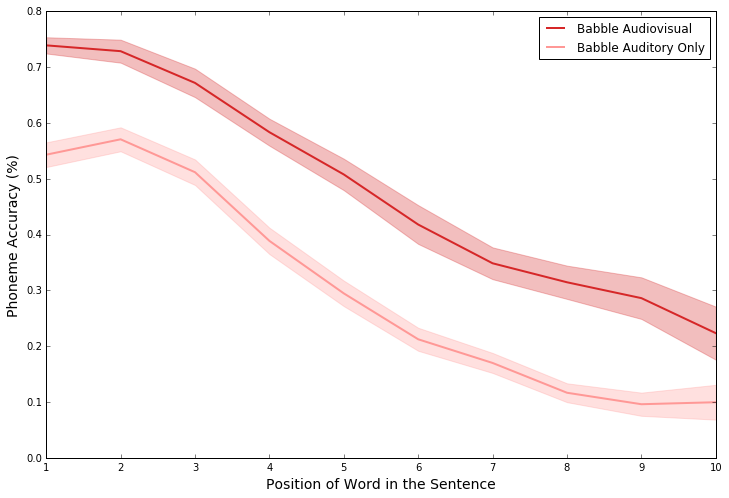

In [29]:
from scipy.stats import linregress, ttest_1samp
plt.figure(figsize = (12,8)) 
for df_idx in [0]:
    df = dfs[df_idx]
    numSubs = len(df['Subject'].unique())
    data = df[['VideoCond','SoundCond','PhonemeHitBool','Subject','WordIdx']].groupby(['WordIdx','VideoCond','SoundCond','Subject']).mean().reset_index()
    data = data.loc[data['SoundCond'] == 'Babble',:]
    means = data[['WordIdx','VideoCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond']).mean()['PhonemeHitBool'].unstack()
    errors = data[['WordIdx','VideoCond','PhonemeHitBool']].groupby(['WordIdx','VideoCond']).std()['PhonemeHitBool'].unstack()/np.sqrt(float(numSubs-1))
    for c, cond in enumerate(['Audiovisual','Auditory Only']):
        errorfill(means.index,means[cond],errors[cond],color = tableau20[c+6])
        plt.ylabel('Phoneme Accuracy (%)')
        plt.xlabel('Position of Word in the Sentence')
        #plt.title('Sumby Ratio over the Course of a Sentence')
    accSlopeBySubject = data[['WordIdx','PhonemeHitBool','Subject','VideoCond']].groupby(['Subject','VideoCond']).apply(lambda v: linregress(v.WordIdx, v.PhonemeHitBool)[0])
    #print accSlopeBySubject
    accMean = accSlopeBySubject.unstack().mean()
    accStd = accSlopeBySubject.unstack().std()

plt.legend(['Babble Audiovisual','Babble Auditory Only'])
export_fig(fig_folder,'PhonACCByWordIdxBabbleCollapsed')
df = dfs[0]

## Key insights and outcomes:
### - Lip movements can dramatically improve the intelligibility of natural speech in noise 
### - Place of articulation is a key predictor of the benefits of lip movements 
### - Word understanding decays over the course of a sentence.

### Extra

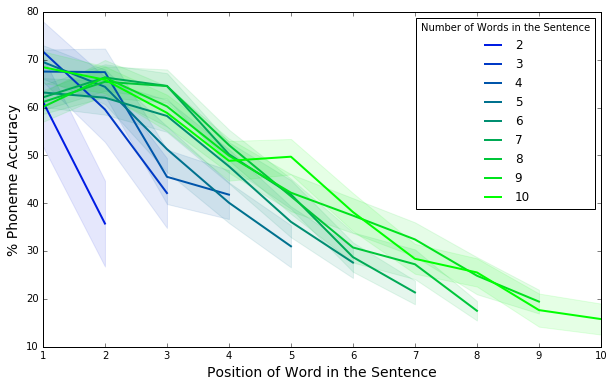

In [30]:
for df_idx in [0]:
    df = dfs[df_idx]
    numSubs = len(df['Subject'].unique())
    isNoisy = df['SoundCond'] == 'Babble'
    dfN = df[isNoisy]
    grouped= dfN[['PhonemeHitBool','WordIdx','NumWordsInSentence','Subject']].groupby(['WordIdx','NumWordsInSentence','Subject'])
    subMean = grouped.mean().reset_index()
    subMean
    subG =subMean[['PhonemeHitBool','WordIdx','NumWordsInSentence','Subject']].groupby(['WordIdx','NumWordsInSentence'])
    # means.columns = {'2','3','4','5','6','7','8','9','10'}
    # errors.columns = {'2','3','4','5','6','7','8','9','10'}
    means = subG.mean()['PhonemeHitBool'].unstack()*100
    errors = (subG.std()['PhonemeHitBool'].unstack()/np.sqrt(float(numSubs-1)))*100
    fig, ax = plt.subplots(figsize = (10,6))
    for x in means.keys():
        errorfill(means.index,means[x],errors[x],color = (0,(x-1)/9,1-(x-1)/9),alpha_fill=0.1)
    ax.legend(loc='upper right',title = 'Number of Words in the Sentence')
    plt.ylabel('% Phoneme Accuracy')
    plt.xlabel('Position of Word in the Sentence')
    export_fig(fig_folder,'PhoneACCByPosByNumWords'+ df_label[df_idx])
df = dfs[0]

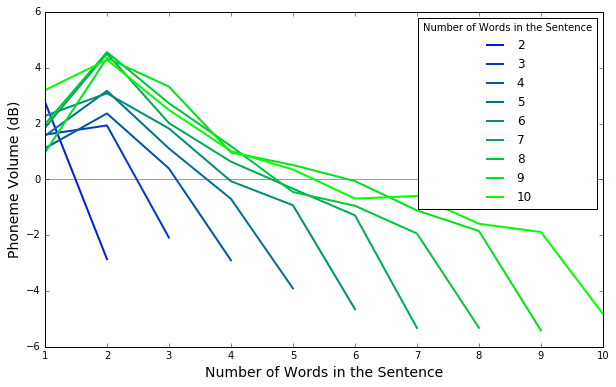

In [31]:
## Plot of 
df['SpeechdB'] =  df['SpeechRMS'].apply(lambda x: amp2db(x) if x >=0 else 0)
df['SpeechdBRel'] = df[['SpeechdB','SentenceCount']].groupby('SentenceCount').apply(lambda x: x-np.mean(x))['SpeechdB']
isNoisy = df['SoundCond'] == 'Babble'
dfN = df[isNoisy]
fig, ax = plt.subplots(figsize = (10,6))
means = dfN[['SpeechdBRel','WordIdx','NumWordsInSentence']].groupby(['WordIdx','NumWordsInSentence']).mean().unstack()
means.columns = means.columns.droplevel()
errors = 0          
for x in means.keys():
    errorfill(means.index,means[x],errors,color = (0,(x-1)/9,1-(x-1)/9),alpha_fill=0.1)
ax.legend(loc='upper right',title='Number of Words in the Sentence')
plt.ylabel('Phoneme Volume (dB)')
plt.xlabel('Number of Words in the Sentence')
export_fig(fig_folder,'VolumeByPosByNumWords')

### About half of the decline in intelligibility could be attributed to declines in volume over the course of a sentence. 